## objective
#### to analyze the biggest factors leading to churn in a telecom company

## project presentation
###### explain the impact of the project. in this case, application of this model should reduce customer loss by 40%
###### what stage of the product lifecycle is addressed by my project
###### justify the approach (supervised/unsupervised)
###### explain the steps taken to solve the problem
###### showcase the model

In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [3]:
df=pd.read_csv('TelcoChurn.csv')

In [3]:
df['Churn']=le.fit_transform(df['Churn'])
Y=df['Churn']
df.drop(['customerID','Churn'],axis=1,inplace=True)

In [ ]:
kaggle datasets download -d blastchar/telco-customer-churn

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
#separating the categorical from continuous variables
df_cat=pd.DataFrame()
df_float=pd.DataFrame()
for x in df.columns:
    if df[x].nunique()>50:
        df_float[x]=df[x]
    else:
        df_cat[x]=df[x]
    

In [9]:
df_float

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [10]:
df_float.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


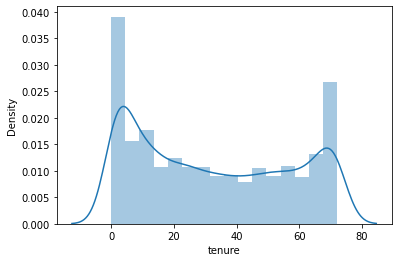

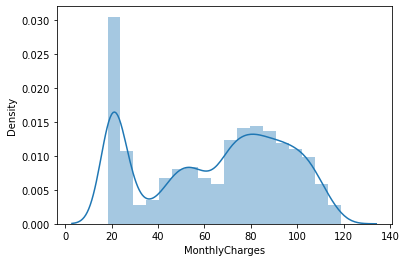

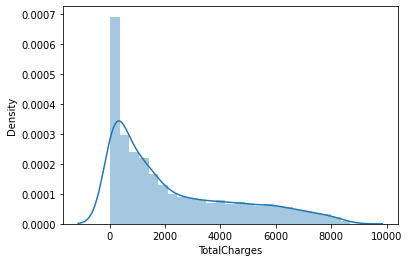

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
for x in df_float.columns:
    plt.figure()
    sns.distplot(df_float[x])
    plt.show

In [12]:
for x in df_float.columns:
    print(df_float[x].quantile([0.05,0.10,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99,1]))
    print()

0.05     1.0
0.10     2.0
0.25     9.0
0.50    29.0
0.75    55.0
0.90    69.0
0.95    72.0
0.96    72.0
0.97    72.0
0.98    72.0
0.99    72.0
1.00    72.0
Name: tenure, dtype: float64

0.05     19.650
0.10     20.050
0.25     35.500
0.50     70.350
0.75     89.850
0.90    102.600
0.95    107.400
0.96    108.950
0.97    110.100
0.98    111.558
0.99    114.729
1.00    118.750
Name: MonthlyCharges, dtype: float64

0.05      49.070
0.10      83.470
0.25     398.550
0.50    1394.550
0.75    3786.600
0.90    5973.690
0.95    6921.025
0.96    7144.692
0.97    7413.212
0.98    7720.172
0.99    8039.256
1.00    8684.800
Name: TotalCharges, dtype: float64



In [13]:
#outlier treatment to be applied to continuous variables
def outliers_cap(x,upper,lower):
    x=x.clip(lower=x.quantile(lower))
    x=x.clip(upper=x.quantile(upper))
    return x
df_float=df_float.apply(lambda x:outliers_cap(x,0.99,0.01))
for x in df_float.columns:
    print(df_float[x].quantile([0.05,0.10,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99,1]))
    print()

0.05     1.0
0.10     2.0
0.25     9.0
0.50    29.0
0.75    55.0
0.90    69.0
0.95    72.0
0.96    72.0
0.97    72.0
0.98    72.0
0.99    72.0
1.00    72.0
Name: tenure, dtype: float64

0.05     19.65000
0.10     20.05000
0.25     35.50000
0.50     70.35000
0.75     89.85000
0.90    102.60000
0.95    107.40000
0.96    108.95000
0.97    110.10000
0.98    111.55800
0.99    114.71682
1.00    114.72900
Name: MonthlyCharges, dtype: float64

0.05      49.07000
0.10      83.47000
0.25     398.55000
0.50    1394.55000
0.75    3786.60000
0.90    5973.69000
0.95    6921.02500
0.96    7144.69200
0.97    7413.21200
0.98    7720.17200
0.99    8037.86748
1.00    8039.25600
Name: TotalCharges, dtype: float64



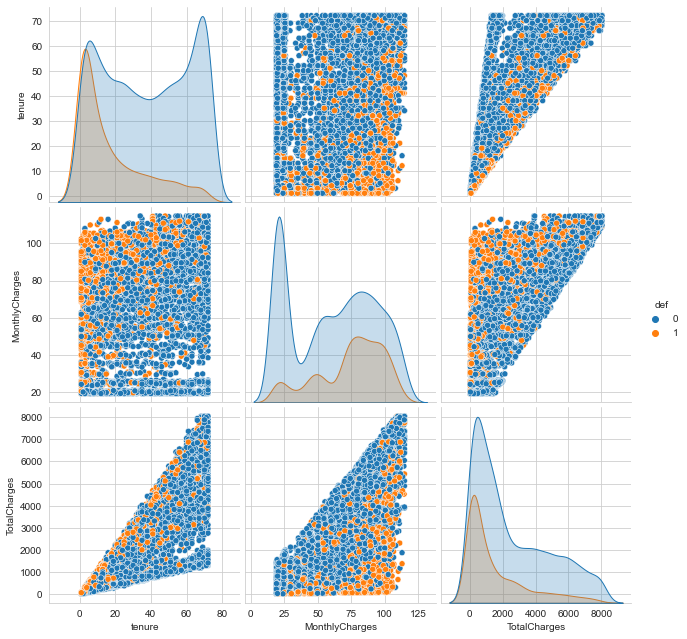

In [14]:
df_float['def']=Y
sns.set_style("whitegrid");
sns.pairplot(df_float, hue="def", size=3);
plt.show()

In [15]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=7,encode='ordinal',strategy='quantile')
df_float_bin=pd.DataFrame(discrete.fit_transform(df_float), index=df_float.index, columns=df_float.columns)

In [16]:
for x in df_float_bin.columns:
    print(df_float_bin[x].value_counts())
    print()

1.0    1108
3.0    1051
6.0    1033
4.0    1014
5.0    1004
2.0     971
0.0     862
Name: tenure, dtype: int64

1.0    1017
6.0    1007
2.0    1006
3.0    1006
5.0    1006
4.0    1006
0.0     995
Name: MonthlyCharges, dtype: int64

1.0    1007
6.0    1007
3.0    1007
0.0    1006
5.0    1006
4.0    1005
2.0    1005
Name: TotalCharges, dtype: int64

0.0    7043
Name: def, dtype: int64



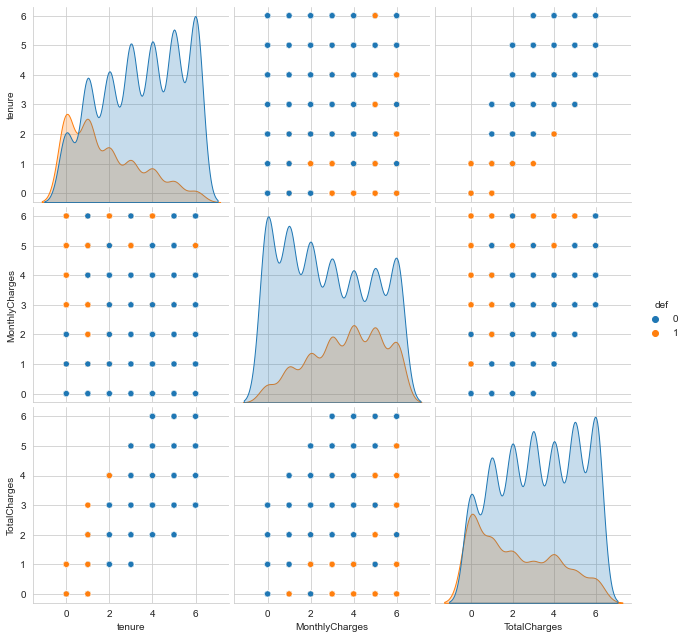

In [17]:
df_float_bin['def']=Y
sns.set_style("whitegrid");
sns.pairplot(df_float_bin, hue="def", size=3);
plt.show()

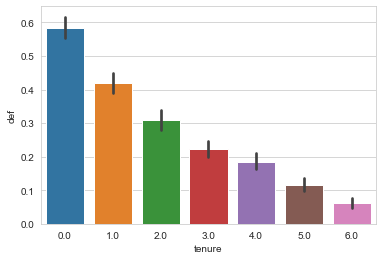

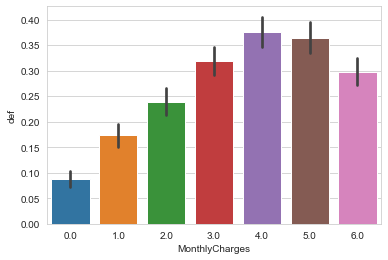

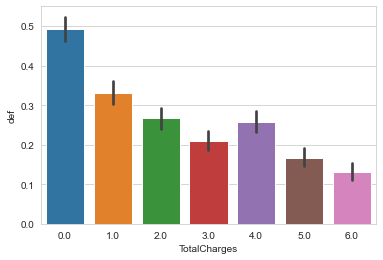

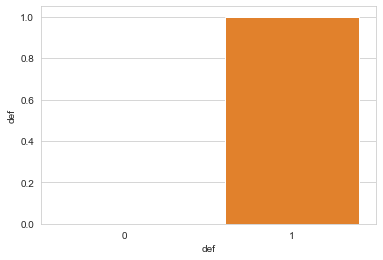

In [18]:
from numpy import mean
for col in df_float_bin.columns:
    sns.barplot(x=col,y='def',data=df_float_bin, estimator=mean)
    plt.show()
plt.show()

In [11]:
# df_float.loc[(df_float['tenure']>0)&(df_float['tenure']<10), 'tenure']=1
# df_float.loc[(df_float['tenure']>=10)&(df_float['tenure']<20), 'tenure']=2
# df_float.loc[(df_float['tenure']>=20)&(df_float['tenure']<30), 'tenure']=3
# df_float.loc[(df_float['tenure']>=30)&(df_float['tenure']<40), 'tenure']=4
# df_float.loc[(df_float['tenure']>=40)&(df_float['tenure']<50), 'tenure']=5
# df_float.loc[(df_float['tenure']>=50)&(df_float['tenure']<60), 'tenure']=6
# df_float.loc[(df_float['tenure']>=60)&(df_float['tenure']<70), 'tenure']=7
# df_float.loc[(df_float['tenure']>=70)&(df_float['tenure']<80), 'tenure']=8


In [ ]:
# df_float.loc[(df_float['MonthlyCharges']>0)&(df_float['MonthlyCharges']<20), 'MonthlyCharges']=1
# df_float.loc[(df_float['MonthlyCharges']>=20)&(df_float['MonthlyCharges']<40), 'MonthlyCharges']=2
# df_float.loc[(df_float['MonthlyCharges']>=40)&(df_float['MonthlyCharges']<60), 'MonthlyCharges']=3
# df_float.loc[(df_float['MonthlyCharges']>=60)&(df_float['MonthlyCharges']<80), 'MonthlyCharges']=4
# df_float.loc[(df_float['MonthlyCharges']>=80)&(df_float['MonthlyCharges']<100), 'MonthlyCharges']=5
# df_float.loc[(df_float['MonthlyCharges']>=100)&(df_float['MonthlyCharges']<120), 'MonthlyCharges']=6


In [19]:
df_float_bin.drop('def',axis=1,inplace=True)

In [20]:
df_float_bin.head()

,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,0.0
1,3.0,2.0,4.0
2,0.0,2.0,0.0
3,4.0,1.0,4.0
4,0.0,3.0,0.0


In [21]:
df_cat.describe(include='object').T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [22]:
#this is to check the variations in each variables to see which classes can be combined
#we dont want high variations (too many unique values)
#we also dont want low variations (unbalanced dataset)
for x in df_cat.columns:
    print(df_cat[x].value_counts())
    print()

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes     

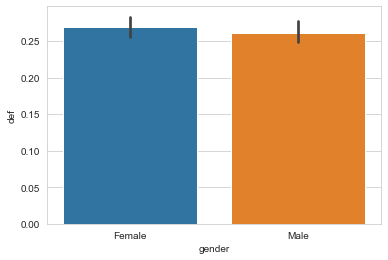

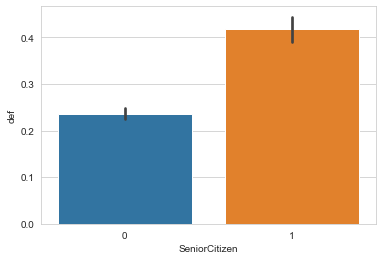

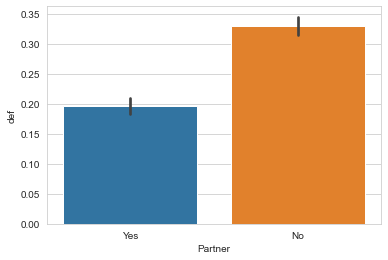

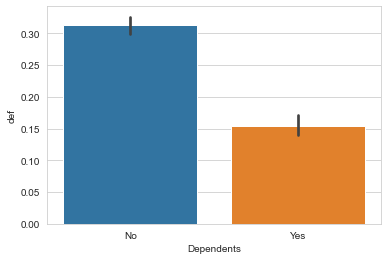

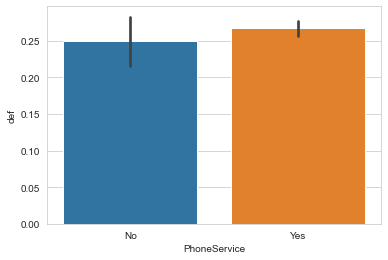

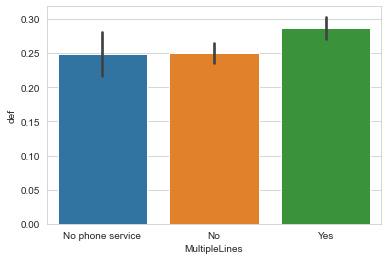

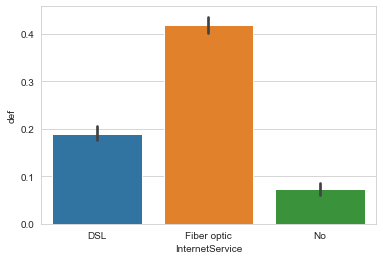

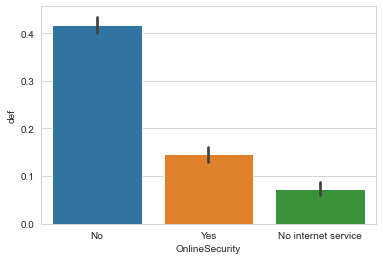

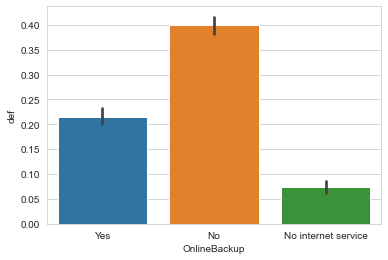

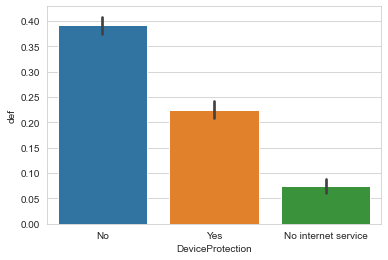

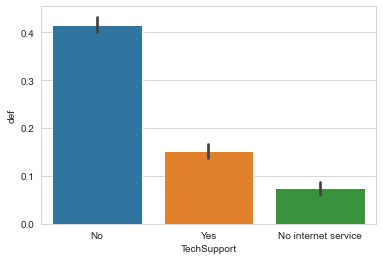

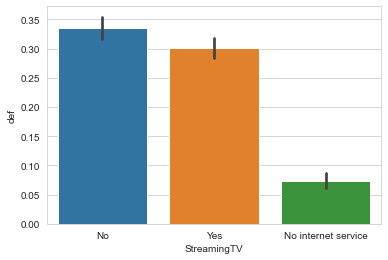

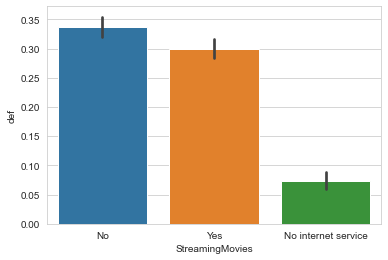

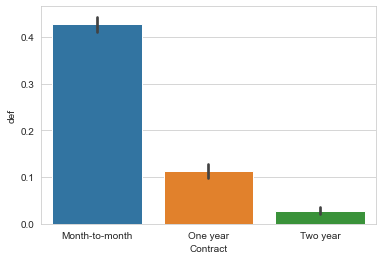

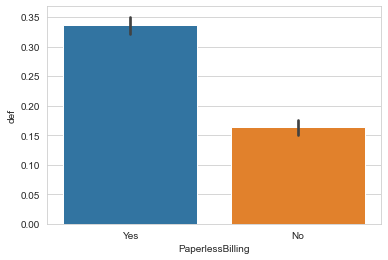

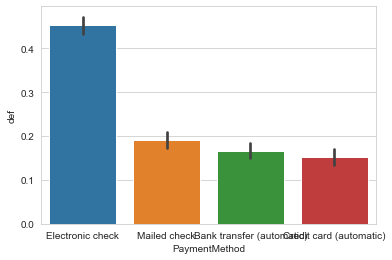

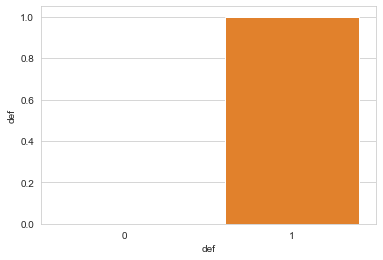

In [23]:
from numpy import mean
df_cat['def']=Y
for col in df_cat.columns:
    sns.barplot(x=col,y='def',data=df_cat, estimator=mean)
    plt.show()
plt.show()

In [24]:
df_cat.drop(['gender','MultipleLines','PhoneService'],axis=1,inplace=True)

In [25]:
# for x in df_cat.columns:
#     df_cat[x]=le.fit_transform(df_cat[x])

In [26]:
df_cat.head()

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,def
0,0,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,0,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,0,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
3,0,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0
4,0,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1


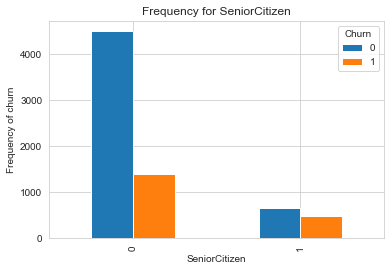

   SeniorCitizen       def
1              1  0.416813
0              0  0.236062
0
of 5901 0 in SeniorCitizen 23.6 churned
1
of 1142 1 in SeniorCitizen 41.7 churned



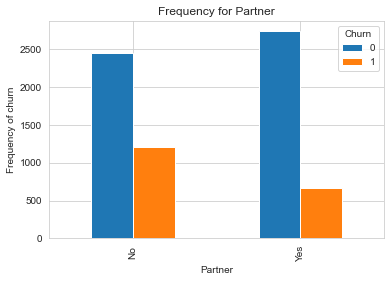

  Partner       def
0      No  0.329580
1     Yes  0.196649
Yes
of 3402 Yes in Partner 19.7 churned
No
of 3641 No in Partner 33.0 churned



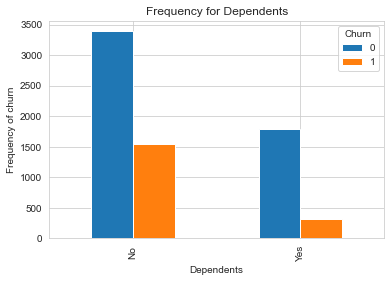

  Dependents       def
0         No  0.312791
1        Yes  0.154502
No
of 4933 No in Dependents 31.3 churned
Yes
of 2110 Yes in Dependents 15.5 churned



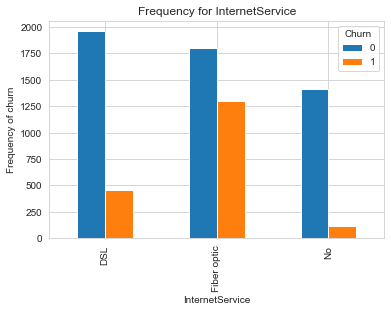

  InternetService       def
1     Fiber optic  0.418928
0             DSL  0.189591
2              No  0.074050
DSL
of 2421 DSL in InternetService 19.0 churned
Fiber optic
of 3096 Fiber optic in InternetService 41.9 churned
No
of 1526 No in InternetService 7.4 churned



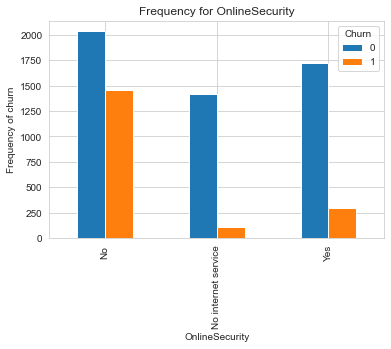

        OnlineSecurity       def
0                   No  0.417667
2                  Yes  0.146112
1  No internet service  0.074050
No
of 3498 No in OnlineSecurity 41.8 churned
Yes
of 2019 Yes in OnlineSecurity 14.6 churned
No internet service
of 1526 No internet service in OnlineSecurity 7.4 churned



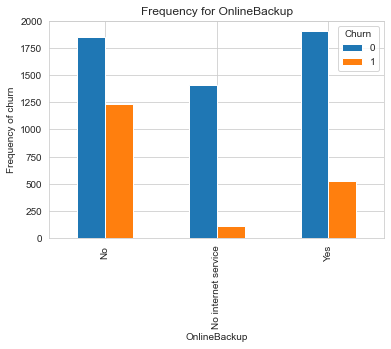

          OnlineBackup       def
0                   No  0.399288
2                  Yes  0.215315
1  No internet service  0.074050
Yes
of 2429 Yes in OnlineBackup 21.5 churned
No
of 3088 No in OnlineBackup 39.9 churned
No internet service
of 1526 No internet service in OnlineBackup 7.4 churned



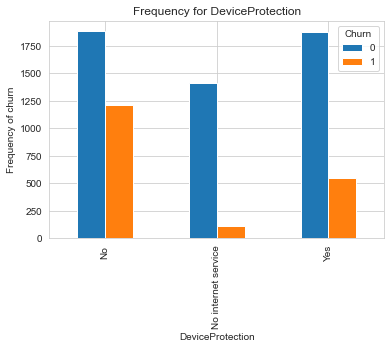

      DeviceProtection       def
0                   No  0.391276
2                  Yes  0.225021
1  No internet service  0.074050
No
of 3095 No in DeviceProtection 39.1 churned
Yes
of 2422 Yes in DeviceProtection 22.5 churned
No internet service
of 1526 No internet service in DeviceProtection 7.4 churned



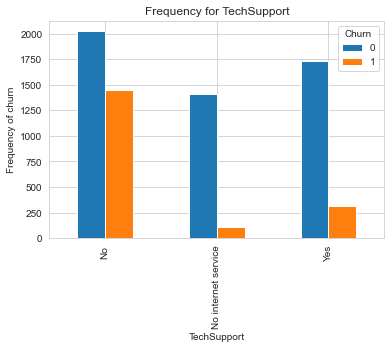

           TechSupport       def
0                   No  0.416355
2                  Yes  0.151663
1  No internet service  0.074050
No
of 3473 No in TechSupport 41.6 churned
Yes
of 2044 Yes in TechSupport 15.2 churned
No internet service
of 1526 No internet service in TechSupport 7.4 churned



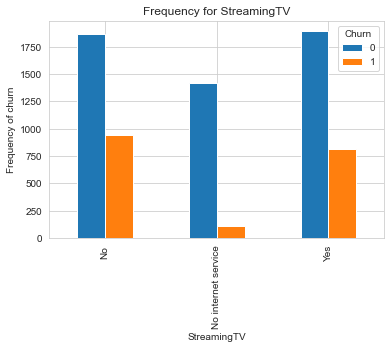

           StreamingTV       def
0                   No  0.335231
2                  Yes  0.300702
1  No internet service  0.074050
No
of 2810 No in StreamingTV 33.5 churned
Yes
of 2707 Yes in StreamingTV 30.1 churned
No internet service
of 1526 No internet service in StreamingTV 7.4 churned



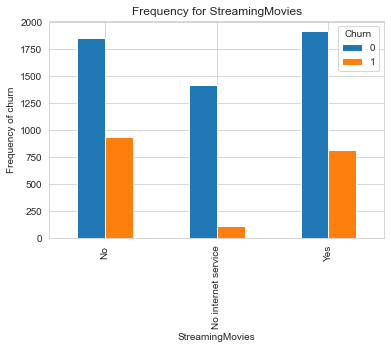

       StreamingMovies       def
0                   No  0.336804
2                  Yes  0.299414
1  No internet service  0.074050
No
of 2785 No in StreamingMovies 33.7 churned
Yes
of 2732 Yes in StreamingMovies 29.9 churned
No internet service
of 1526 No internet service in StreamingMovies 7.4 churned



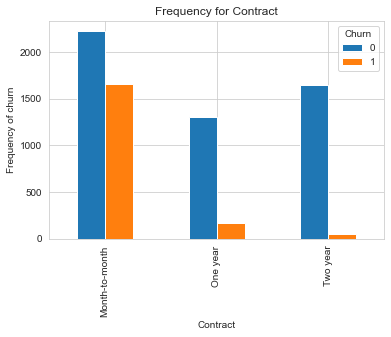

         Contract       def
0  Month-to-month  0.427097
1        One year  0.112695
2        Two year  0.028319
Month-to-month
of 3875 Month-to-month in Contract 42.7 churned
One year
of 1473 One year in Contract 11.3 churned
Two year
of 1695 Two year in Contract 2.8 churned



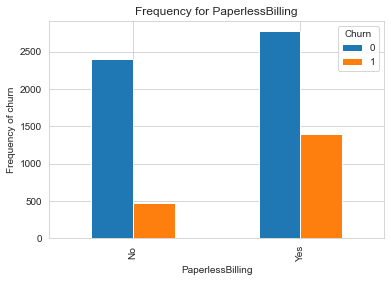

  PaperlessBilling       def
1              Yes  0.335651
0               No  0.163301
Yes
of 4171 Yes in PaperlessBilling 33.6 churned
No
of 2872 No in PaperlessBilling 16.3 churned



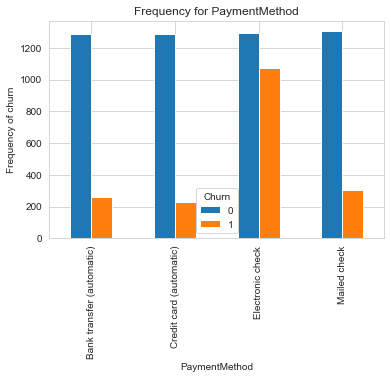

               PaymentMethod       def
2           Electronic check  0.452854
3               Mailed check  0.191067
0  Bank transfer (automatic)  0.167098
1    Credit card (automatic)  0.152431
Electronic check
of 2365 Electronic check in PaymentMethod 45.3 churned
Mailed check
of 1612 Mailed check in PaymentMethod 19.1 churned
Bank transfer (automatic)
of 1544 Bank transfer (automatic) in PaymentMethod 16.7 churned
Credit card (automatic)
of 1522 Credit card (automatic) in PaymentMethod 15.2 churned



In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

df_cat['def']=Y
for x in df_cat.columns[:-1]:
    pd.crosstab(df_cat[x],Y).plot(kind='bar')
    plt.title('Frequency for '+x)
    plt.xlabel(x)
    plt.ylabel('Frequency of churn')
    #plt.savefig('purchase_fre_job')
    plt.show()
    print(df_cat[[x,'def']].groupby(x,as_index=False).mean().sort_values('def',ascending=False))
    for y in df_cat[x].unique():
        print(y)
        print('of',len(df_cat[x][(df_cat[x]==y)]), y, 'in',x,round(len(df_cat[x][(df_cat[x]==y)&(df_cat['def']==1)])/len(df_cat[x][(df_cat[x]==y)]) *100,1),'churned')
    print()
    
df_cat.drop('def', axis=1,inplace=True)    

In [28]:
df_cat.head()

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,0,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,0,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,0,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,0,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [35]:
df_cat_dum=pd.get_dummies(df_cat)

In [36]:
df_cat_dum.shape

(7043, 35)

In [49]:
from sklearn.feature_selection import SelectKBest, chi2
selector=SelectKBest(chi2, k=20 )
selector.fit_transform(df_cat_dum,Y)
cols=selector.get_support(indices=True)
df_cat_dum_k=df_cat_dum.iloc[:,cols]

In [50]:
df_cat_dum_k.head()

,SeniorCitizen,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_No internet service,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaymentMethod_Electronic check
0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0
4,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1


In [51]:
#columns that has been dropped
#for x in df_cat_dum.columns:
    if x not in df_cat_dum_k.columns:
        print(x)

Partner_No
Partner_Yes
Dependents_No
Dependents_Yes
InternetService_DSL
OnlineBackup_Yes
DeviceProtection_Yes
StreamingTV_No
StreamingTV_Yes
StreamingMovies_No
StreamingMovies_Yes
PaperlessBilling_Yes
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Mailed check


In [56]:
data=pd.concat([df_float_bin,df_cat_dum_k],axis=1)

In [57]:
from collections import Counter
Counter(Y)

Counter({0: 5174, 1: 1869})

In [58]:
data.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_No internet service,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaymentMethod_Electronic check
0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
1,3.0,2.0,4.0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0
2,0.0,2.0,0.0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,4.0,1.0,4.0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0
4,0.0,3.0,0.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1


In [60]:
# Import library
from sklearn.preprocessing import MinMaxScaler
# Initialize the Object
scaler = MinMaxScaler()
# Fit and Transform The Data
scaler.fit(data)
data_scaled = scaler.transform(data)

In [61]:
data_scaled=pd.DataFrame(data_scaled)
data_scaled.columns=data.columns
data_scaled.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_No internet service,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaymentMethod_Electronic check
0,0.000000,0.166667,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.500000,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.666667,0.166667,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.000000,0.500000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [62]:
from sklearn.decomposition import PCA
pca=PCA()
pca_result=pca.fit(data_scaled)
#pca_result.components_

Text(0, 0.5, 'cummulative explained variance')

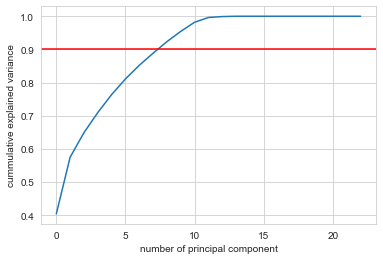

In [63]:
plt.plot(np.cumsum(pca_result.explained_variance_ratio_))
plt.axhline(y=.9,color='r')
plt.xlabel('number of principal component')
plt.ylabel('cummulative explained variance')

In [64]:
pca_num_components = 12
pca=PCA(n_components=pca_num_components)
df_pca = pca.fit_transform(data_scaled)
df_pca = pd.DataFrame(df_pca,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12'])

In [65]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score,roc_curve, classification_report,auc

randoms_state=42
np.random.seed(42)

In [238]:
X=data.copy()
y=Y.copy()
# skf=StratifiedKFold(n_splits=5,random_state=42, shuffle=True)
# for train_index, valid_index in skf.split(data,y):
#     x_train,x_valid=X.iloc[train_index],X.iloc[valid_index]
#     y_train,y_valid=y.iloc[train_index],y.iloc[valid_index]
x_train,x_test,y_train,y_test=train_test_split(data,Y, stratify=Y, test_size=0.2, random_state=42)
    
print('x_train',x_train.shape)
print('x_valid',x_valid.shape)
print('y_train',y_train.shape)
print('y_valid',y_valid.shape)

x_train (5634, 23)
x_valid (1408, 23)
y_train (5634,)
y_valid (1408,)


In [239]:
from collections import Counter
from numpy import where
Counter(y)

Counter({0: 5174, 1: 1869})

In [240]:
print('train imbalanced',Counter(y_train))
print('test imbalanced',Counter(y_valid))

train imbalanced Counter({0: 4139, 1: 1495})
test imbalanced Counter({0: 1034, 1: 374})


In [241]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over=SMOTE(random_state=42, sampling_strategy=0.4)
#under=RandomUnderSampler(sampling_strategy=0.9, random_state=42)
#steps=[('o',over),('u',under)]
steps=[('o',over)]
sm=Pipeline(steps=steps)

x_train,y_train=sm.fit_resample(x_train,y_train)
#x_valid,y_valid=sm.fit_resample(x_valid,y_valid)

In [242]:
print('train imbalanced',Counter(y_train))
print('test imbalanced',Counter(y_valid))

train imbalanced Counter({0: 4139, 1: 1655})
test imbalanced Counter({0: 1034, 1: 374})


In [244]:
lr=LogisticRegression(random_state=42)
lr.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [245]:
coff=pd.DataFrame(x_train.columns, columns=['features'])
coff['coefficient']=pd.Series(lr.coef_[0])

In [246]:
coff.sort_values('coefficient')

,features,coefficient
20,Contract_Two year,-2.294655
19,Contract_One year,-1.425354
8,OnlineSecurity_Yes,-0.961843
18,Contract_Month-to-month,-0.708570
15,TechSupport_Yes,-0.701370
21,PaperlessBilling_No,-0.470808
6,OnlineSecurity_No,-0.451520
13,TechSupport_No,-0.362086
2,TotalCharges,-0.303175
14,TechSupport_No internet service,-0.215373


In [247]:
coff.sort_values('coefficient')

,features,coefficient
20,Contract_Two year,-2.294655
19,Contract_One year,-1.425354
8,OnlineSecurity_Yes,-0.961843
18,Contract_Month-to-month,-0.708570
15,TechSupport_Yes,-0.701370
21,PaperlessBilling_No,-0.470808
6,OnlineSecurity_No,-0.451520
13,TechSupport_No,-0.362086
2,TotalCharges,-0.303175
14,TechSupport_No internet service,-0.215373


In [248]:
lr.score(x_train,y_train)

0.7999654815326199

In [249]:
cv_score=cross_val_score(lr,x_valid,y_valid, cv=5)
print('cv score is', np.average(cv_score))

cv score is 0.803975164685394


In [250]:
threshold=0.5
pred=np.where(lr.predict_proba(x_valid)[:,1]>threshold,1,0)

In [251]:
Counter(pred)

Counter({0: 1089, 1: 319})

In [252]:
accuracy_score(y_valid,pred)

0.7961647727272727

In [253]:
cm=confusion_matrix(y_valid,pred)
cm=pd.crosstab(y_valid,pred)
cm

col_0,0,1
Churn,,
0,918,116
1,171,203


In [205]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(data,Y, stratify=Y, test_size=0.2, random_state=42)

In [115]:
print('train imbalanced',Counter(y_train))
print('test imbalanced',Counter(y_test))

train imbalanced Counter({0: 4139, 1: 1495})
test imbalanced Counter({0: 1035, 1: 374})


In [116]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over=SMOTE(random_state=42, sampling_strategy=0.6)
#under=RandomUnderSampler(sampling_strategy=0.9, random_state=42)
#steps=[('o',over),('u',under)]
steps=[('o',over)]
sm=Pipeline(steps=steps)

#x_train,y_train=sm.fit_resample(x_train,y_train)
#x_test,y_test=sm.fit_resample(x_test,y_test)

In [117]:
print('train imbalanced',Counter(y_train))
print('test imbalanced',Counter(y_test))

train imbalanced Counter({0: 4139, 1: 1495})
test imbalanced Counter({0: 1035, 1: 374})


In [208]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=42)
tree.fit(x_train,y_train)
train_pred=tree.predict(x_train)
test_pred=tree.predict(x_test)
print('tree depth is',tree.get_depth())
print('number of leaf node is',tree.get_n_leaves())
print()
print('training accuracy is',accuracy_score(y_train,train_pred))
print( 'testing accuracy is',accuracy_score(y_test,test_pred))
tree.get_params()

tree depth is 18
number of leaf node is 1274

training accuracy is 0.9030883919062833
testing accuracy is 0.7558552164655784


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [210]:
#pa attention to these parameters
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params={
  'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
  'min_samples_split':[50,100,130,140,150,160,170,180,190,200,210,220,230,250],
  'max_features': [3,4,5,6,7,8,9,10,11,12,13,14,15,16],
  'max_leaf_nodes':[5,10,15,20,25,30,35,40,45,50,55,60,65],
}
tree=DecisionTreeClassifier(random_state=42)
#tree_cv=RandomizedSearchCV(tree,params, cv=5,n_jobs=-1,random_state=42)
tree_cv=GridSearchCV(tree,param_grid=params, cv=5,n_jobs=-1)
tree_cv.fit(x_train,y_train)
print('best score is',tree_cv.best_score_)
print('best paramsters is',tree_cv.best_params_)

best score is 0.8010266335277644
best paramsters is {'max_depth': 7, 'max_features': 16, 'max_leaf_nodes': 20, 'min_samples_split': 100}


In [220]:
dtree=DecisionTreeClassifier(random_state=42, max_leaf_nodes= 20, max_features= 16, max_depth=7,min_samples_split= 100)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, max_features=16, max_leaf_nodes=20,
                       min_samples_split=100, random_state=42)

In [212]:
#cost complexity prunning (post pruning)
tree=DecisionTreeClassifier(random_state=42)
path=tree.cost_complexity_pruning_path(x_train,y_train)
alphas=path['ccp_alphas']

In [213]:
len(alphas)

593

In [214]:
alphas.max(),alphas.min()

(0.0643937092505496, 0.0)

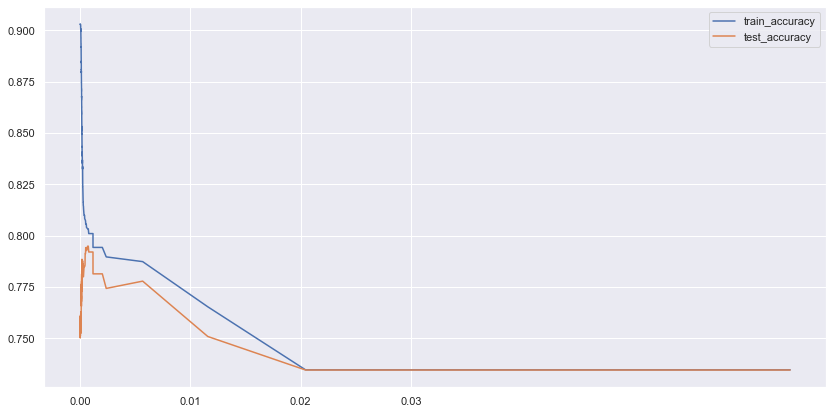

In [215]:
train_accuracy,test_accuracy=[],[]
for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    tree.fit(x_train,y_train)
    train_pred=tree.predict(x_train)
    test_pred=tree.predict(x_test)
    #print('tree depth is',tree.get_depth())
    #print('number of leaf node is',tree.get_n_leaves())
    #print()
    train_accuracy.append(accuracy_score(y_train,train_pred))
    test_accuracy.append(accuracy_score(y_test,test_pred))
    #tree.get_params()
    
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=train_accuracy,x=alphas,label='train_accuracy')
sns.lineplot(y=test_accuracy,x=alphas,label='test_accuracy')
plt.xticks(ticks=np.arange(0,0.04,0.01))
plt.show()

In [216]:
pd.DataFrame({'alphas':alphas,'train_accuracy':train_accuracy,'test_accuracy':test_accuracy}).sort_values('test_accuracy',ascending=False)

,alphas,train_accuracy,test_accuracy
578,0.000755,0.803337,0.794890
577,0.000698,0.803337,0.794890
571,0.000518,0.805644,0.794180
574,0.000579,0.805289,0.794180
572,0.000523,0.805644,0.794180
...,...,...,...
117,0.000030,0.903088,0.750887
114,0.000027,0.903088,0.750177
2,0.000000,0.903088,0.750177
591,0.020455,0.734647,0.734564


In [221]:
dtree2=DecisionTreeClassifier(ccp_alpha=0.000755,random_state=42)
dtree2.fit(x_train,y_train)
# train_pred=tree.predict(x_train)
# test_pred=tree.predict(x_test)
# #print('tree depth is',tree.get_depth())
# #print('number of leaf node is',tree.get_n_leaves())
# #print()
# print('tree depth is',tree.get_depth())
# print('number of leaf node is',tree.get_n_leaves())
# print()
# print('training accuracy is',accuracy_score(y_train,train_pred))
# print( 'testing accuracy is',accuracy_score(y_test,test_pred))
# #tree.get_params()

DecisionTreeClassifier(ccp_alpha=0.000755, random_state=42)

In [218]:
# pred=tree.predict(x_test)
# accuracy_score(pred,y_test)

In [219]:
# cm=confusion_matrix(y_test,pred)
# cm=pd.crosstab(y_test,pred)
# cm

In [223]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=42, max_leaf_nodes= 20, max_features= 16, max_depth=7,min_samples_split= 100)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, max_features=16, max_leaf_nodes=20,
                       min_samples_split=100, random_state=42)

In [226]:
pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance']).sort_values('importance',ascending=False)

,importance
Contract_Month-to-month,0.419147
tenure,0.143912
InternetService_Fiber optic,0.127162
OnlineSecurity_No,0.114146
TechSupport_No,0.047169
TotalCharges,0.043872
MonthlyCharges,0.032459
PaymentMethod_Electronic check,0.026825
PaperlessBilling_No,0.013008
SeniorCitizen,0.007107


In [228]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(criterion='mse',random_state=42, max_leaf_nodes= 20, max_features= 16, max_depth=7,min_samples_split= 100)
gb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=7, max_features=16,
                           max_leaf_nodes=20, min_samples_split=100,
                           random_state=42)

In [229]:
pd.DataFrame(gb.feature_importances_, index=x_train.columns, columns=['importance']).sort_values('importance',ascending=False)

,importance
Contract_Month-to-month,0.369870
tenure,0.140307
InternetService_Fiber optic,0.098282
OnlineSecurity_No,0.096781
TotalCharges,0.052543
TechSupport_No,0.048524
MonthlyCharges,0.047610
PaymentMethod_Electronic check,0.037947
PaperlessBilling_No,0.028937
OnlineBackup_No,0.021255


In [230]:
from sklearn.ensemble import StackingClassifier
base_learners=[
    ('rf',RandomForestClassifier(criterion='gini',random_state=42, max_leaf_nodes= 20, max_features= 16, max_depth=7,min_samples_split= 100)),
    ('gb',GradientBoostingClassifier(criterion='mse',random_state=42, max_leaf_nodes= 20, max_features= 16, max_depth=7,min_samples_split= 100))
]

In [232]:
clf=StackingClassifier(estimators=base_learners,final_estimator=LogisticRegression())

In [233]:
clf.fit(x_train,y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=7,
                                                       max_features=16,
                                                       max_leaf_nodes=20,
                                                       min_samples_split=100,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(criterion='mse',
                                                           max_depth=7,
                                                           max_features=16,
                                                           max_leaf_nodes=20,
                                                           min_samples_split=100,
                                                           random_state=42))],
                   final_estimator=LogisticRegression())

In [254]:
l_pred=lr.predict(x_test)
d_pred=dtree.predict(x_test)
d2_pred=dtree2.predict(x_test)
rf_pred=rf.predict(x_test)
gb_pred=gb.predict(x_test)
clf_pred=clf.predict(x_test)

In [255]:
from sklearn import metrics
for x in [l_pred,d_pred,d2_pred,rf_pred,gb_pred,clf_pred]:
    print(x)
    print('accuracy-',metrics.accuracy_score(y_test,x))
    print('recall-',metrics.recall_score(y_test,x))
    print('precision-',metrics.precision_score(y_test,x))
    print('f1-',metrics.f1_score(y_test,x))
    print()

[0 1 0 ... 0 0 0]
accuracy- 0.8048261178140526
recall- 0.56951871657754
precision- 0.6513761467889908
f1- 0.6077032810271041

[0 1 0 ... 0 0 0]
accuracy- 0.7785663591199432
recall- 0.5721925133689839
precision- 0.5846994535519126
f1- 0.5783783783783784

[0 1 0 ... 0 0 0]
accuracy- 0.794889992902768
recall- 0.5106951871657754
precision- 0.6430976430976431
f1- 0.5692995529061102

[0 1 0 ... 0 0 0]
accuracy- 0.8034066713981547
recall- 0.5213903743315508
precision- 0.6655290102389079
f1- 0.5847076461769115

[0 1 0 ... 0 0 0]
accuracy- 0.7877927608232789
recall- 0.5
precision- 0.6254180602006689
f1- 0.5557206537890045

[0 1 0 ... 0 0 0]
accuracy- 0.8055358410220014
recall- 0.5213903743315508
precision- 0.6724137931034483
f1- 0.5873493975903614



In [236]:
for x in [l_pred,d_pred,d2_pred,rf_pred,gb_pred,clf_pred]:
    print(classification_report(y_test,x))
    print()

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.58      0.57      0.58       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409


              pr

In [315]:
df['target']=Y

In [396]:
#get the probability value of each prediction
y_pred_proba=gb.predict_proba(data)[:,1]
df['predict_proba_logreg']=pd.DataFrame(y_pred_proba)

#we group the ranked probabilities into 10 bins i.e bin1 contains datapoints with lowest probs while group 10 contains data with highest prob
df['p_rank_logreg']=pd.qcut(df['predict_proba_logreg'].rank(method='first').values,10,duplicates='drop').codes+1

#for each bins find the actuel percentage of churn in each bin
rank_df_actuals=df.groupby('p_rank_logreg')['target'].agg(['count','mean'])

#for each bins find the predicted percentage of churn in each bin
rank_df_pred=df.groupby('p_rank_logreg')['predict_proba_logreg'].agg(['count','mean'])

#renaming columns
rank_df_actuals=rank_df_actuals.rename(columns={'mean':'actual churn percentage','count':'count1'})

#renming columns
rank_df_pred=rank_df_pred.rename(columns={'mean':'predicted churn percentage'})

#combining the actual prediction precentage and predicted percentage of each bins
rank_df=pd.concat([rank_df_pred,rank_df_actuals],axis=1,join='inner')

rank_df.drop('count1',axis=1,inplace=True)

sorted_rank_df=rank_df.sort_index(ascending=False)

#getting the numbers of churners in a bin
sorted_rank_df['N_churners']=sorted_rank_df['count']*sorted_rank_df['actual churn percentage']

#checking to see the progression of churners as we do down the bins
sorted_rank_df['cum_N_churners']=sorted_rank_df['N_churners'].cumsum()

#checking the percentage of churners in each group with respect to the total percentage of churners
sorted_rank_df['bin_churn_percentage']=sorted_rank_df['N_churners']/max(sorted_rank_df['N_churners'].cumsum())

#cummulative bin percentage
sorted_rank_df['cum_bin_churn_percentage']=sorted_rank_df['bin_churn_percentage'].cumsum()


#repeating the steps above for non churners
sorted_rank_df['N_non_churners']=sorted_rank_df['count']-sorted_rank_df['N_churners']
sorted_rank_df['cum_N_non_churners']=sorted_rank_df['N_non_churners'].cumsum()
sorted_rank_df['bin_non_churn_percentage']=sorted_rank_df['N_non_churners']/max(sorted_rank_df['N_non_churners'].cumsum())
sorted_rank_df['cum_bin_non_churn_percentage']=sorted_rank_df['bin_non_churn_percentage'].cumsum()


sorted_rank_df['ks']=sorted_rank_df['cum_bin_churn_percentage']-sorted_rank_df['cum_bin_non_churn_percentage']

sorted_rank_df['cum_percentage_of_people_in_bin']=(sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())).cumsum()

r_sorted_rank_df=sorted_rank_df.reset_index()

r_sorted_rank_df['axis']=r_sorted_rank_df.index+1

r_sorted_rank_df



,p_rank_logreg,count,predicted churn percentage,actual churn percentage,N_churners,cum_N_churners,bin_churn_percentage,cum_bin_churn_percentage,N_non_churners,cum_N_non_churners,bin_non_churn_percentage,cum_bin_non_churn_percentage,ks,cum_percentage_of_people_in_bin,axis
0,10,705,0.793880,0.815603,575.0,575.0,0.307651,0.307651,130.0,130.0,0.025126,0.025126,2.825255e-01,0.100099,1
1,9,704,0.605070,0.593750,418.0,993.0,0.223649,0.531300,286.0,416.0,0.055276,0.080402,4.508982e-01,0.200057,2
2,8,704,0.448506,0.502841,354.0,1347.0,0.189406,0.720706,350.0,766.0,0.067646,0.148048,5.726583e-01,0.300014,3
3,7,704,0.306629,0.306818,216.0,1563.0,0.115570,0.836276,488.0,1254.0,0.094318,0.242366,5.939104e-01,0.399972,4
4,6,704,0.215171,0.193182,136.0,1699.0,0.072766,0.909042,568.0,1822.0,0.109780,0.352145,5.568969e-01,0.499929,5
5,5,705,0.133073,0.131915,93.0,1792.0,0.049759,0.958801,612.0,2434.0,0.118284,0.470429,4.883724e-01,0.600028,6
6,4,704,0.080641,0.059659,42.0,1834.0,0.022472,0.981273,662.0,3096.0,0.127947,0.598376,3.828969e-01,0.699986,7
7,3,704,0.039275,0.031250,22.0,1856.0,0.011771,0.993044,682.0,3778.0,0.131813,0.730189,2.628550e-01,0.799943,8
8,2,704,0.019498,0.015625,11.0,1867.0,0.005886,0.998930,693.0,4471.0,0.133939,0.864128,1.348016e-01,0.899901,9
9,1,705,0.010692,0.002837,2.0,1869.0,0.001070,1.000000,703.0,5174.0,0.135872,1.000000,2.220446e-16,1.000000,10


<AxesSubplot:xlabel='axis', ylabel='actual churn percentage'>

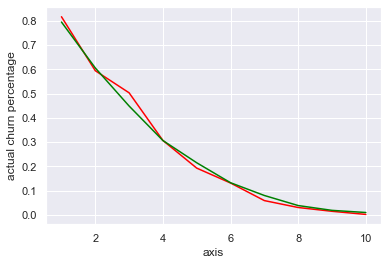

In [397]:
sns.lineplot(x='axis',y='actual churn percentage',data=r_sorted_rank_df,color='red')
sns.lineplot(x='axis',y='predicted churn percentage',data=r_sorted_rank_df,color='green')

In [399]:
r_sorted_rank_df

,p_rank_logreg,count,predicted churn percentage,actual churn percentage,N_churners,cum_N_churners,bin_churn_percentage,cum_bin_churn_percentage,N_non_churners,cum_N_non_churners,bin_non_churn_percentage,cum_bin_non_churn_percentage,ks,cum_percentage_of_people_in_bin,axis
0,10,705,0.793880,0.815603,575.0,575.0,0.307651,0.307651,130.0,130.0,0.025126,0.025126,2.825255e-01,0.100099,1
1,9,704,0.605070,0.593750,418.0,993.0,0.223649,0.531300,286.0,416.0,0.055276,0.080402,4.508982e-01,0.200057,2
2,8,704,0.448506,0.502841,354.0,1347.0,0.189406,0.720706,350.0,766.0,0.067646,0.148048,5.726583e-01,0.300014,3
3,7,704,0.306629,0.306818,216.0,1563.0,0.115570,0.836276,488.0,1254.0,0.094318,0.242366,5.939104e-01,0.399972,4
4,6,704,0.215171,0.193182,136.0,1699.0,0.072766,0.909042,568.0,1822.0,0.109780,0.352145,5.568969e-01,0.499929,5
5,5,705,0.133073,0.131915,93.0,1792.0,0.049759,0.958801,612.0,2434.0,0.118284,0.470429,4.883724e-01,0.600028,6
6,4,704,0.080641,0.059659,42.0,1834.0,0.022472,0.981273,662.0,3096.0,0.127947,0.598376,3.828969e-01,0.699986,7
7,3,704,0.039275,0.031250,22.0,1856.0,0.011771,0.993044,682.0,3778.0,0.131813,0.730189,2.628550e-01,0.799943,8
8,2,704,0.019498,0.015625,11.0,1867.0,0.005886,0.998930,693.0,4471.0,0.133939,0.864128,1.348016e-01,0.899901,9
9,1,705,0.010692,0.002837,2.0,1869.0,0.001070,1.000000,703.0,5174.0,0.135872,1.000000,2.220446e-16,1.000000,10


## with gradient booting, we have been able to get the high value churners
## we were able to limit 72% of the total churn rate to just 30% of the customers

In [398]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,predict_proba_logreg,p_rank_logreg
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0.565199,9
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0.040325,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0.510575,8
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0.041192,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0.800164,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,0.041497,3
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,0.251157,7
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0.343535,7
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,0.520280,8


In [408]:
#ranking the tenure of customers into bins
df['tenure_rank']=pd.qcut(df['tenure'].rank(method='first').values,10, duplicates='drop').codes+1

In [432]:
df.groupby('tenure_rank')['tenure'].agg(['min','max','mean'])

,min,max,mean
tenure_rank,,,
High tenure,29,72,54.121272
Low tenure,0,29,10.627200


In [431]:
#average tenure used by a customer
df['tenure'].mean()

32.37114865824223

In [418]:
df['tenure_rank']=np.where((df['tenure_rank']>=6),'High tenure','Low tenure')

In [434]:
#ranking the monthly charges of customers into bins
df['MonthlyCharges_rank']=pd.qcut(df['MonthlyCharges'].rank(method='first').values,10, duplicates='drop').codes+1

In [436]:
df.groupby('MonthlyCharges_rank')['MonthlyCharges'].agg(['min','max','mean'])

,min,max,mean
MonthlyCharges_rank,,,
1,18.25,20.05,19.622482
2,20.05,25.05,21.732599
3,25.05,45.85,35.514773
4,45.85,58.75,52.532244
5,58.85,70.35,65.314965
6,70.35,79.10,74.623864
7,79.10,85.50,82.140057
8,85.50,94.25,89.840199
9,94.25,102.60,98.036364


In [437]:
df['MonthlyCharges'].mean()

64.76169246059922

In [438]:
df['MonthlyCharges_rank']=np.where((df['MonthlyCharges_rank']>=6),'High monthly charges','Low monthly charges')

In [441]:
#df[df['MonthlyCharges_rank']=='High monthly charges']

In [442]:
#df[df['MonthlyCharges']>64.7]

In [426]:
df['churn_rank']=np.where((df['p_rank_logreg']>=8),'top 30%','bottom 70%')

In [491]:
df_30=df[df['churn_rank']=='top 30%']

In [469]:
df_30['target'].value_counts()

1    1347
0     766
Name: target, dtype: int64

In [470]:
1347/len(df[df['target']==1])

0.7207062600321027

In [480]:
col_fe=[ 'SeniorCitizen','InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','target']

In [481]:
df_30=df_30[col_fe]

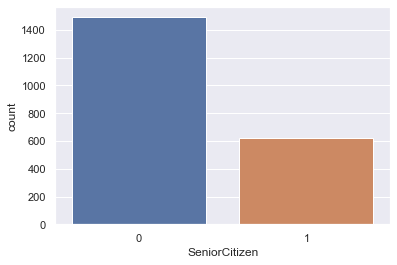

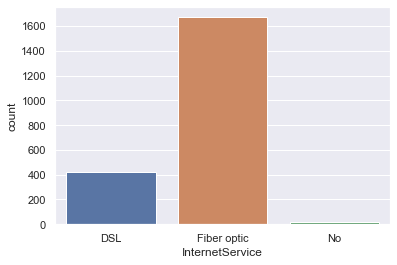

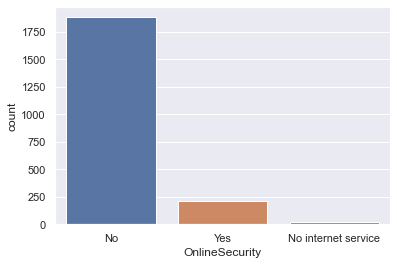

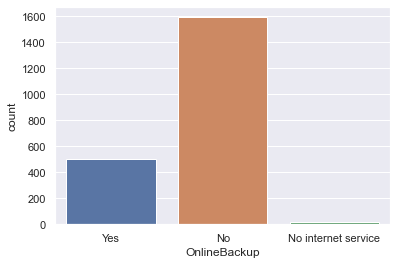

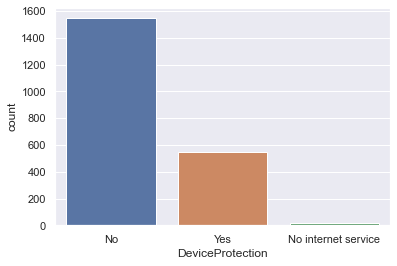

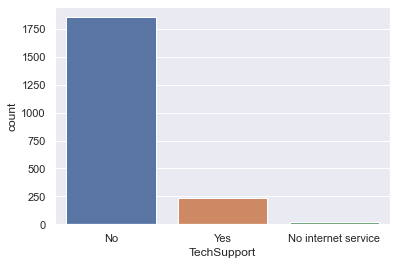

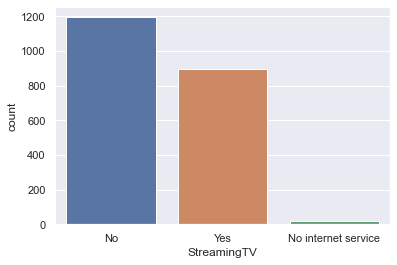

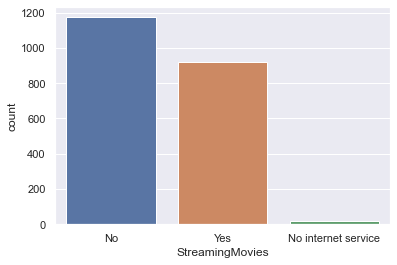

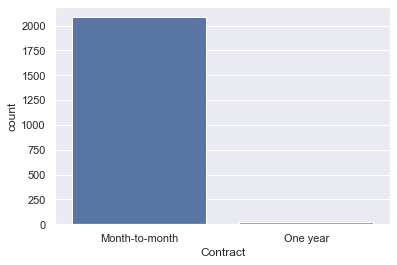

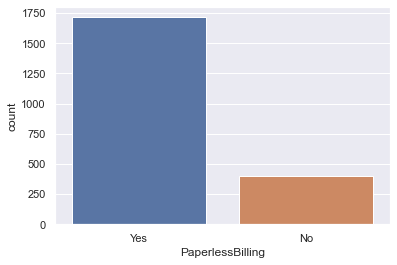

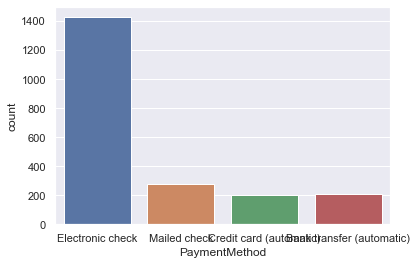

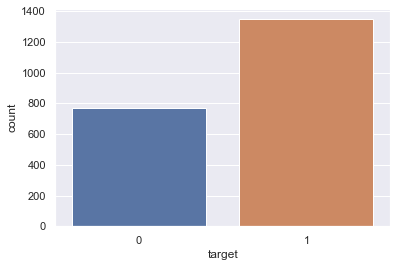

In [487]:
from numpy import mean
for col in df_30.columns:
    sns.countplot(x=col,data=df_30)
    plt.show()
plt.show()

In [485]:
col

'InternetService'

In [486]:
df_30['InternetService']

0               DSL
2               DSL
4       Fiber optic
5       Fiber optic
6       Fiber optic
           ...     
7029            DSL
7032    Fiber optic
7033    Fiber optic
7035    Fiber optic
7041    Fiber optic
Name: InternetService, Length: 2113, dtype: object

In [492]:
pd.crosstab(index=df_30['MonthlyCharges_rank'],columns=df_30['tenure_rank'],values=df_30['target'],aggfunc='count')

tenure_rank,High tenure,Low tenure
MonthlyCharges_rank,,
High monthly charges,349,1183
Low monthly charges,28,553


In [488]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,predict_proba_logreg,p_rank_logreg,tenure_rank,churn_rank,MonthlyCharges_rank
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0.565199,9,Low tenure,top 30%,Low monthly charges
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0.040325,3,High tenure,bottom 70%,Low monthly charges
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0.510575,8,Low tenure,top 30%,Low monthly charges
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0.041192,3,High tenure,bottom 70%,Low monthly charges
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0.800164,10,Low tenure,top 30%,High monthly charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,0.041497,3,Low tenure,bottom 70%,High monthly charges
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,0.251157,7,High tenure,bottom 70%,High monthly charges
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0.343535,7,Low tenure,bottom 70%,Low monthly charges
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,0.520280,8,Low tenure,top 30%,High monthly charges


In [ ]:
#business insights
1. add more discount to the 1 year plan to enable more people subscribe to them
2. create plans to make people use more online backup
3. move customers from fiberoptics to dsl